# IoT Data Simulation, Preprocessing, and Visualization
## Assignment Instructions:
- Simulate sensor data (temperature).
- Apply moving average smoothing.
- Detect anomalies (3-sigma rule).
- Visualize raw vs smoothed data and highlight anomalies.

In [1]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 2. Simulate Sensor Data
time = pd.date_range(start='2024-01-01', periods=500, freq='min')  # 500 minutes
temperature = 20 + np.cumsum(np.random.randn(500)) * 0.1  # random walk

# Inject anomalies
temperature[100] += 8
temperature[400] -= 7

# Create DataFrame
data = pd.DataFrame({'time': time, 'temperature': temperature})
data.head()

,time,temperature
0,2024-01-01 00:00:00,19.858095
1,2024-01-01 00:01:00,20.099105
2,2024-01-01 00:02:00,20.210222
3,2024-01-01 00:03:00,20.105216
4,2024-01-01 00:04:00,20.289263


In [3]:
# 3. Apply Moving Average Smoothing
data['sma'] = data['temperature'].rolling(window=10).mean()
data.iloc[10:20]

,time,temperature,sma
10,2024-01-01 00:10:00,20.370849,20.271868
11,2024-01-01 00:11:00,20.312429,20.293201
12,2024-01-01 00:12:00,20.392594,20.311438
13,2024-01-01 00:13:00,20.352167,20.336133
14,2024-01-01 00:14:00,20.155870,20.322794
15,2024-01-01 00:15:00,20.205557,20.306616
16,2024-01-01 00:16:00,20.172312,20.293229
17,2024-01-01 00:17:00,20.152278,20.274187
18,2024-01-01 00:18:00,19.987169,20.242535
19,2024-01-01 00:19:00,19.663324,20.176455


In [4]:
# 4. Anomaly Detection (3-sigma Rule)
mean = np.mean(data['temperature'])
std = np.std(data['temperature'])

data['abnormal'] = np.abs(data['temperature'] - mean) > 3 * std
data.iloc[99:102]

,time,temperature,sma,abnormal
99,2024-01-01 01:39:00,19.230721,19.105743,False
100,2024-01-01 01:40:00,27.095509,19.898043,True
101,2024-01-01 01:41:00,19.005716,19.893976,False


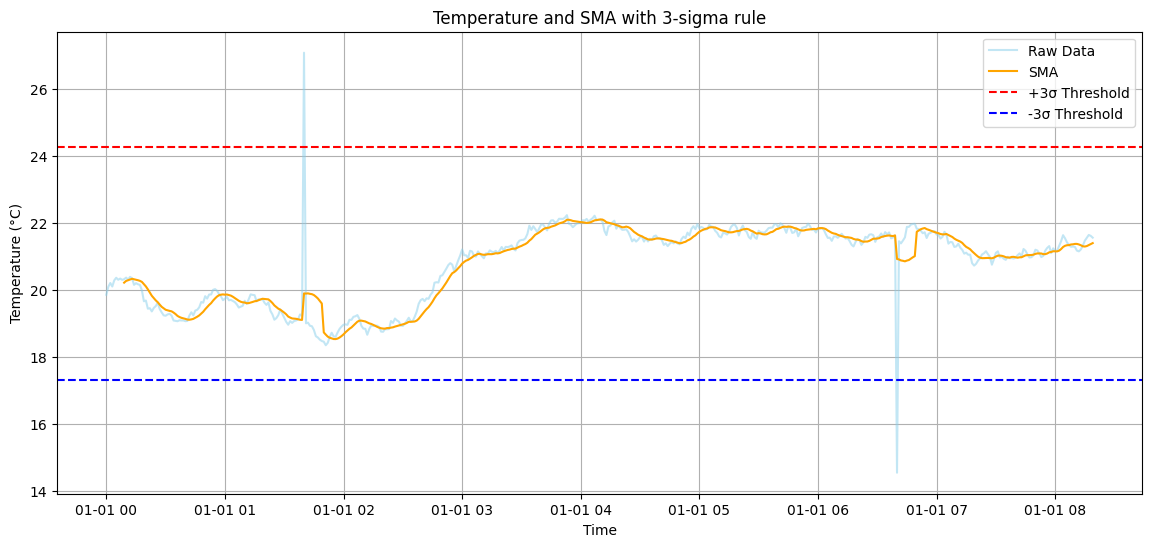

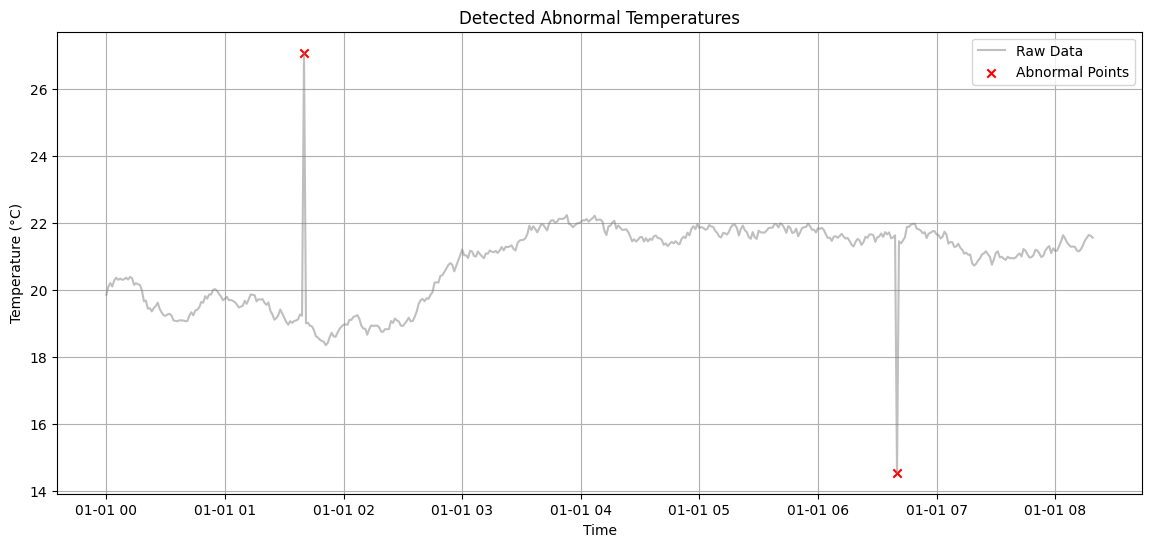

In [5]:
# 5. Visualization

# Plot temperature, SMA and sigma threshold
plt.figure(figsize=(14, 6))
plt.plot(
    data["time"], data["temperature"], label="Raw Data", alpha=0.5, color="skyblue"
)
plt.plot(data["time"], data["sma"], label="SMA", color="orange")
plt.axhline(mean + 3 * std, color="red", linestyle="--", label="+3σ Threshold")
plt.axhline(mean - 3 * std, color="blue", linestyle="--", label="-3σ Threshold")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature and SMA with 3-sigma rule")
plt.grid(True)
plt.show()

# Plot abnormalities
plt.figure(figsize=(14, 6))
plt.plot(data["time"], data["temperature"], label="Raw Data", alpha=0.5, color="grey")
plt.scatter(
    x=data["time"][data["abnormal"]],
    y=data["temperature"][data["abnormal"]],
    color="red",
    label="Abnormal Points",
    marker="x",
)

plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Detected Abnormal Temperatures")
plt.grid(True)
plt.show()